# Team 82 Final EDA 2014 -2018

##  Team 82 project examines factors affecting students test scores in grades 4 and 8 2014-2018.
We examine parent social and economic demographics, school funding  and  community factors 

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
dfs= ('df_1011','df_1112','df_1213','df_1314','df_1415','df_1516','df_1617','df_1718')
dfs1618= ('df_1617','df_1718')

In [3]:
math_df_201011 = pd.read_csv('./data_sets/clean/math_scores_sy1011.csv')
math_df_201112 = pd.read_csv('./data_sets/clean/math_scores_sy1112.csv')
math_df_201213 = pd.read_csv('./data_sets/clean/math_scores_sy1213.csv')
math_df_201314 = pd.read_csv('./data_sets/clean/math_scores_sy1314.csv')
math_df_201415 = pd.read_csv('./data_sets/clean/math_scores_sy1415.csv')
math_df_201516 = pd.read_csv('./data_sets/clean/math_scores_sy1516.csv')
math_df_201617 = pd.read_csv('./data_sets/clean/math_scores_sy1617.csv')
math_df_201718 = pd.read_csv('./data_sets/clean/math_scores_sy1718.csv')

rla_df_201011 = pd.read_csv('./data_sets/clean/rla_scores_sy1011.csv')
rla_df_201112 = pd.read_csv('./data_sets/clean/rla_scores_sy1112.csv')
rla_df_201213 = pd.read_csv('./data_sets/clean/rla_scores_sy1213.csv')
rla_df_201314 = pd.read_csv('./data_sets/clean/rla_scores_sy1314.csv')
rla_df_201415 = pd.read_csv('./data_sets/clean/rla_scores_sy1415.csv')
rla_df_201516 = pd.read_csv('./data_sets/clean/rla_scores_sy1516.csv')
rla_df_201617 = pd.read_csv('./data_sets/clean/rla_scores_sy1617.csv')
rla_df_201718 = pd.read_csv('./data_sets/clean/rla_scores_sy1718.csv')

parent_social_econ_by_district_df = pd.read_csv('./data_sets/clean/teacher_parentdg_econ_social_dg20142018.csv')



/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,24,216) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,10,12,14,16,18,20,22,24,26,28,30,32,33,34,38,40,42,46,52,54,56,58,60,62,64,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,10

## Math Analysis for School Year 2014  - 2015

In [4]:
math_df_201011_clean = math_df_201011.dropna()
math_df_201112_clean = math_df_201112.dropna()
math_df_201213_clean = math_df_201213.dropna()
math_df_201314_clean = math_df_201314.dropna()
math_df_201415_clean = math_df_201415.dropna()
math_df_201516_clean = math_df_201516.dropna()
math_df_201617_clean = math_df_201617.dropna()
math_df_201718_clean = math_df_201718.dropna()

In [5]:
# Math scoores  by school district
math_df_201415

,STNAM,FIPST,LEAID,LEANM,DATE_CUR,ALL_MTH04NUMVALID_1415,ALL_MTH04PCTPROF_1415,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
0,ALABAMA,1,100005,Albertville City,13APR16,392.0,41.0,201.0,27.0,5.0,NaN,339.0,19.0,156.0,12.0,17.0,10.0
1,ALABAMA,1,100006,Marshall County,13APR16,440.0,44.0,354.0,40.0,56.0,34.0,393.0,25.0,290.0,22.0,35.0,15.0
2,ALABAMA,1,100007,Hoover City,13APR16,1011.0,65.0,280.0,42.0,5.0,NaN,1140.0,61.0,271.0,32.0,6.0,25.0
3,ALABAMA,1,100008,Madison City,13APR16,736.0,73.0,183.0,47.0,7.0,25.0,778.0,59.0,171.0,32.0,6.0,25.0
4,ALABAMA,1,100011,Leeds City,13APR16,146.0,37.0,75.0,22.0,3.0,NaN,118.0,32.0,65.0,22.0,2.0,NaN
5,ALABAMA,1,100012,Boaz City,13APR16,197.0,47.0,141.0,37.0,8.0,25.0,176.0,27.0,115.0,22.0,7.0,25.0
6,ALABAMA,1,100013,Trussville City,13APR16,333.0,74.0,34.0,64.0,NaN,NaN,345.0,46.0,38.0,24.0,NaN,NaN
7,ALABAMA,1,100030,Alexander City,13APR16,217.0,42.0,149.0,37.0,NaN,NaN,236.0,37.0,138.0,22.0,NaN,NaN
8,ALABAMA,1,100060,Andalusia City,13APR16,121.0,27.0,79.0,22.0,1.0,NaN,124.0,27.0,67.0,12.0,1.0,NaN
9,ALABAMA,1,100090,Anniston City,13APR16,156.0,27.0,116.0,22.0,24.0,30.0,136.0,12.0,103.0,8.0,9.0,25.0


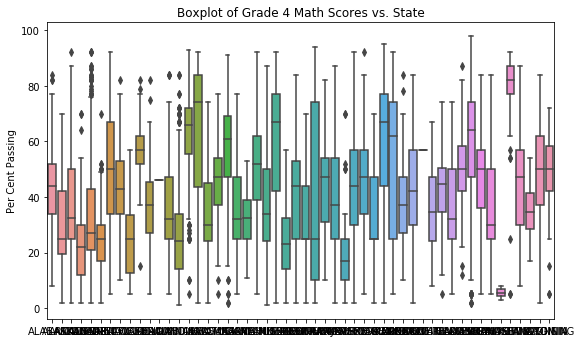

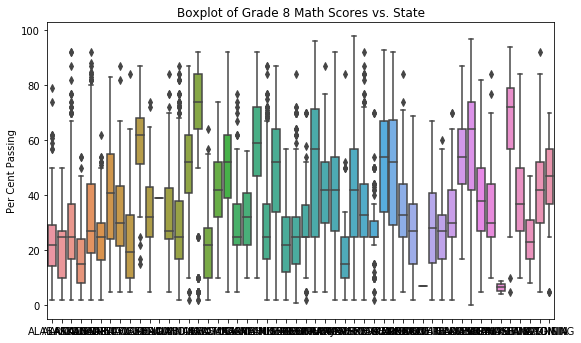

In [6]:
import textwrap
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)

g = sns.boxplot(x="STNAM", y="ALL_MTH04PCTPROF_1415", data=math_df_201415)
g.set(ylabel='Per Cent Passing', xlabel='')
#g.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in g.get_xticklabels()])
plt.title("Boxplot of Grade 4 Math Scores vs. State")
plt.show()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
g = sns.boxplot(x="STNAM", y="ALL_MTH08PCTPROF_1415", data=math_df_201415)
g.set(ylabel='Per Cent Passing', xlabel='')
#g.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in g.get_xticklabels()])
plt.title("Boxplot of Grade 8 Math Scores vs. State")

plt.show()
    

Box plot shows that grades dropped from grades 4 to grades 8. 

In [7]:
math_states_2011 = math_df_201011_clean.groupby(by=["STNAM"]).mean()
math_states_2012 = math_df_201112_clean.groupby(by=["STNAM"]).mean()
math_states_2013 = math_df_201213_clean.groupby(by=["STNAM"]).mean()
math_states_2014 = math_df_201314_clean.groupby(by=["STNAM"]).mean()
math_states_2015 = math_df_201415_clean.groupby(by=["STNAM"]).mean()
math_states_2016 = math_df_201516_clean.groupby(by=["STNAM"]).mean()
math_states_2017 = math_df_201617_clean.groupby(by=["STNAM"]).mean()
math_states_2018 = math_df_201718_clean.groupby(by=["STNAM"]).mean()


In [8]:

math_states_2015

,FIPST,LEAID,ALL_MTH04NUMVALID_1415,ALL_MTH04PCTPROF_1415,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
STNAM,,,,,,,,,,,,,,
ALABAMA,1.0,1.014946e+05,716.000000,43.756098,409.804878,35.487805,35.073171,27.975610,720.463415,24.682927,381.829268,15.414634,30.000000,18.731707
ALASKA,2.0,2.003780e+05,1397.800000,44.200000,555.400000,31.400000,45.400000,19.400000,1356.000000,32.000000,488.600000,18.400000,40.600000,11.600000
ARIZONA,4.0,4.042249e+05,1016.584906,33.943396,567.226415,27.603774,25.433962,22.169811,1012.320755,26.207547,519.660377,21.037736,21.698113,19.735849
ARKANSAS,5.0,5.069106e+05,429.400000,23.666667,287.100000,17.100000,13.366667,21.966667,325.133333,16.166667,223.866667,13.833333,11.100000,22.666667
CALIFORNIA,6.0,6.212963e+05,1392.986047,29.358140,953.925581,21.116279,71.437209,19.613953,1299.786047,29.013953,858.116279,21.241860,55.855814,20.060465
COLORADO,8.0,8.044714e+05,2014.142857,26.428571,935.238095,14.619048,55.714286,13.761905,1731.666667,26.333333,766.809524,15.428571,42.714286,14.238095
CONNECTICUT,9.0,9.030660e+05,1124.400000,16.800000,873.600000,13.200000,22.000000,13.000000,1057.000000,13.400000,761.600000,9.000000,17.200000,19.000000
DELAWARE,10.0,1.000620e+06,773.000000,50.000000,449.142857,38.285714,17.000000,19.285714,720.428571,36.714286,366.714286,25.285714,14.428571,18.571429
DISTRICT OF COLUMBIA,11.0,1.100023e+06,1266.666667,34.000000,973.000000,28.000000,40.666667,20.666667,621.000000,23.000000,565.666667,22.666667,23.666667,18.333333


In [9]:
# MTH04 =  Math Grade 4   MTH08 = Math Grade 8
# ECD =  Economically Disadvantaged  HOM = Homeless   
math_states_2015.columns



Index(['FIPST', 'LEAID', 'ALL_MTH04NUMVALID_1415', 'ALL_MTH04PCTPROF_1415',
       'ECD_MTH04NUMVALID_1415', 'ECD_MTH04PCTPROF_1415',
       'HOM_MTH04NUMVALID_1415', 'HOM_MTH04PCTPROF_1415',
       'ALL_MTH08NUMVALID_1415', 'ALL_MTH08PCTPROF_1415',
       'ECD_MTH08NUMVALID_1415', 'ECD_MTH08PCTPROF_1415',
       'HOM_MTH08NUMVALID_1415', 'HOM_MTH08PCTPROF_1415'],
      dtype='object')

In [10]:

print ( math_states_2015[['ALL_MTH04NUMVALID_1415', 'ALL_MTH04PCTPROF_1415',
                           'ECD_MTH04NUMVALID_1415', 'ECD_MTH04PCTPROF_1415',
                           'HOM_MTH04NUMVALID_1415', 'HOM_MTH04PCTPROF_1415',
                           'ALL_MTH08NUMVALID_1415', 'ALL_MTH08PCTPROF_1415',
                            'ECD_MTH08NUMVALID_1415', 'ECD_MTH08PCTPROF_1415',
                           'HOM_MTH08NUMVALID_1415', 'HOM_MTH08PCTPROF_1415']].describe(), "\n")

       ALL_MTH04NUMVALID_1415  ALL_MTH04PCTPROF_1415  ECD_MTH04NUMVALID_1415  \
count               49.000000              49.000000               49.000000   
mean              2051.000106              44.118025             1343.085220   
std               4705.410738              15.193497             3698.712261   
min                416.583333              16.800000              175.750000   
25%                695.540541              33.943396              422.811594   
50%               1016.584906              42.500000              604.285714   
75%               1459.000000              52.115942              878.060000   
max              31067.000000              82.433333            25495.000000   

       ECD_MTH04PCTPROF_1415  HOM_MTH04NUMVALID_1415  HOM_MTH04PCTPROF_1415  \
count              49.000000               49.000000              49.000000   
mean               35.135408               46.990129              25.742622   
std                15.229232              

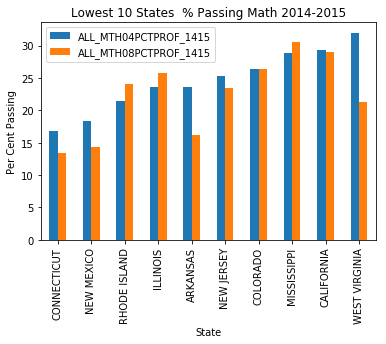

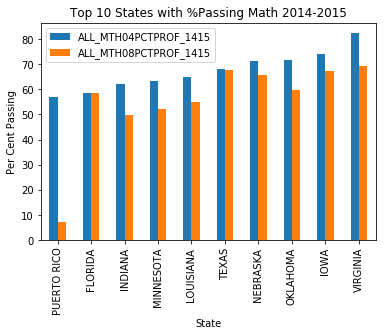

,FIPST,LEAID,ALL_MTH04NUMVALID_1415,ALL_MTH04PCTPROF_1415,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
STNAM,,,,,,,,,,,,,,
CONNECTICUT,9.0,9.030660e+05,1124.400000,16.800000,873.600000,13.200000,22.000000,13.000000,1057.000000,13.400000,761.600000,9.000000,17.200000,19.000000
NEW MEXICO,35.0,3.501039e+06,605.230769,18.307692,481.461538,15.307692,23.769231,15.923077,591.153846,14.384615,439.153846,11.153846,18.615385,18.846154
RHODE ISLAND,44.0,4.400765e+06,1026.000000,21.500000,856.000000,12.500000,10.500000,25.000000,929.000000,24.000000,725.500000,14.000000,7.500000,25.000000
ILLINOIS,17.0,1.722342e+06,1199.240000,23.620000,878.060000,15.320000,38.760000,19.620000,1125.220000,25.760000,800.380000,17.420000,35.540000,20.840000
ARKANSAS,5.0,5.069106e+05,429.400000,23.666667,287.100000,17.100000,13.366667,21.966667,325.133333,16.166667,223.866667,13.833333,11.100000,22.666667
NEW JERSEY,34.0,3.408446e+06,894.882353,25.235294,644.529412,19.235294,19.352941,19.588235,789.235294,23.411765,540.117647,18.823529,13.823529,21.411765
COLORADO,8.0,8.044714e+05,2014.142857,26.428571,935.238095,14.619048,55.714286,13.761905,1731.666667,26.333333,766.809524,15.428571,42.714286,14.238095
MISSISSIPPI,28.0,2.802437e+06,482.875000,28.812500,372.625000,22.062500,37.625000,18.625000,462.250000,30.625000,351.937500,23.500000,27.937500,20.875000
CALIFORNIA,6.0,6.212963e+05,1392.986047,29.358140,953.925581,21.116279,71.437209,19.613953,1299.786047,29.013953,858.116279,21.241860,55.855814,20.060465


In [11]:
#df.sort_values(by=['col1']

math_states_2015_sorted = math_states_2015.sort_values(by=['ALL_MTH04PCTPROF_1415'])
tdf = math_states_2015_sorted[['ALL_MTH04PCTPROF_1415','ALL_MTH08PCTPROF_1415']][0:10]
tdf8 = math_states_2015_sorted[['ALL_MTH04PCTPROF_1415','ALL_MTH08PCTPROF_1415']][0:10]

tdf8.plot.bar()

plt.xlabel('State')
plt.ylabel("Per Cent Passing")
plt.title('Lowest 10 States  % Passing Math 2014-2015')
plt.show()

tdf8 = math_states_2015_sorted[['ALL_MTH04PCTPROF_1415','ALL_MTH08PCTPROF_1415']][-10:]

tdf8.plot.bar()
plt.xlabel('State')
plt.ylabel("Per Cent Passing")
plt.title('Top 10 States with %Passing Math 2014-2015')
plt.show()



math_states_2015_sorted 

In [12]:
parent_social_econ_by_district_df 


,GeoId_x,Geography_x,LEAID,Year_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,...,num_Educational_Attain_POP_AssocDeg,pc_Educational_Attain_POP_AssocDeg,num_Educational_Attain_POP_BacDeg,pc_Educational_Attain_POP_BacDeg,num_Educational_Attain_POP_GradProf,pc_Educational_Attain_POP_GradProf,PDP02.5_37est,pct_Educational_Attain_POP_HS_Grad_higher,PDP02.5_38est,pct_Educational_Attain_BS_Deg_higher
0,97000US2700106,A.C.G.C. Public School District,2700106,2014-2018,202,11.8,3.1,11.8,3.1,11.8,...,175.0,19.0,140.0,15.0,40.0,4.0,855.0,94.0,180.0,19.0
1,97000US4500690,Abbeville County School District,4500690,2014-2018,202,21.9,5.5,21.9,5.5,21.9,...,580.0,19.0,460.0,15.0,250.0,8.0,2740.0,92.0,715.0,24.0
2,97000US5500030,Abbotsford School District,5500030,2014-2018,202,16.0,6.9,16.0,6.9,16.1,...,65.0,9.0,75.0,11.0,4.0,0.0,545.0,81.0,80.0,11.0
3,97000US4807380,Abbott Independent School District,4807380,2014-2018,202,0.0,17.3,0.0,17.3,0.0,...,45.0,21.0,80.0,38.0,25.0,11.0,205.0,97.0,105.0,50.0
4,97000US5300030,Aberdeen School District,5300030,2014-2018,202,18.3,5.1,18.3,5.1,18.4,...,255.0,8.0,275.0,9.0,265.0,9.0,2410.0,83.0,540.0,18.0
5,97000US2800360,Aberdeen School District,2800360,2014-2018,202,14.9,7.5,14.9,7.5,15.1,...,160.0,12.0,150.0,11.0,40.0,3.0,1155.0,91.0,190.0,15.0
6,97000US1600030,Aberdeen School District 58,1600030,2014-2018,202,16.0,12.5,16.0,12.5,16.0,...,45.0,7.0,50.0,8.0,45.0,7.0,420.0,73.0,95.0,16.0
7,97000US4807410,Abernathy Independent School District,4807410,2014-2018,202,6.9,6.9,6.9,6.9,6.9,...,30.0,4.0,145.0,19.0,30.0,4.0,680.0,90.0,175.0,23.0
8,97000US4807440,Abilene Independent School District,4807440,2014-2018,202,16.7,2.3,16.7,2.4,16.8,...,1480.0,10.0,1725.0,12.0,890.0,6.0,12175.0,89.0,2615.0,19.0
9,97000US2003180,Abilene Unified School District 435,2003180,2014-2018,202,2.3,2.2,2.3,2.2,2.3,...,145.0,10.0,305.0,21.0,100.0,7.0,1270.0,91.0,410.0,29.0


In [13]:
parent_social_econ_by_district_df_clean = parent_social_econ_by_district_df.dropna()

In [14]:
parent_social_econ_by_district_states_df = parent_social_econ_by_district_df.groupby(by=["ST_NAME"]).mean()

In [15]:
parent_social_econ_by_district_df_clean.columns

Index(['GeoId_x', 'Geography_x', 'LEAID', 'Year_x', 'Iteration_x',
       'pct_Below PovLvL_All_Ages', 'pctmoe_Below PovLvL_All_Ages',
       'pct_Below PovLvL_Age_gte_18', 'pctmoe_Below PovLvL_Age_gte_18',
       'pct_Below PovLvL_Age_18_64', 'pctmoe_Below PovLvL_Age_18_64',
       'pct_Below PovLvL_Age_gte_65', 'pctmoe_Below PovLvL_Age_gte_65',
       'LEA_NAME', 'ST_NAME', 'LEA_CWIFTEST', 'LEA_CWIFTSE', 'GeoId_y',
       'Geography_y', 'Year_y', 'Iteration_y', 'num_Educational_Attain_POP',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_A

In [16]:
print (parent_social_econ_by_district_df_clean[['pct_Below PovLvL_All_Ages', 'pctmoe_Below PovLvL_All_Ages',
       'pct_Below PovLvL_Age_gte_18', 'pctmoe_Below PovLvL_Age_gte_18',
       'pct_Below PovLvL_Age_18_64', 'pctmoe_Below PovLvL_Age_18_64',
       'pct_Below PovLvL_Age_gte_65', 'pctmoe_Below PovLvL_Age_gte_65',
       'LEA_CWIFTEST', 'LEA_CWIFTSE',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_Attain_POP_BacDeg',
       'num_Educational_Attain_POP_GradProf',
       'pc_Educational_Attain_POP_GradProf', 'PDP02.5_37est',
       'pct_Educational_Attain_POP_HS_Grad_higher', 'PDP02.5_38est',
       'pct_Educational_Attain_BS_Deg_higher']].describe())

       pct_Below PovLvL_All_Ages  pctmoe_Below PovLvL_All_Ages  \
count                5920.000000                   5920.000000   
mean                   12.172010                      4.677044   
std                     8.719912                      3.066878   
min                     0.000000                      0.200000   
25%                     5.500000                      2.400000   
50%                    10.300000                      4.000000   
75%                    17.000000                      6.100000   
max                    62.500000                     25.900000   

       pct_Below PovLvL_Age_gte_18  pctmoe_Below PovLvL_Age_gte_18  \
count                  5920.000000                     5920.000000   
mean                     12.168193                        4.675642   
std                       8.718201                        3.066471   
min                       0.000000                        0.200000   
25%                       5.500000                     

In [17]:
df = parent_social_econ_by_district_states_df

# reset index  only once
df.reset_index(level=0, inplace=True)
df['ST_NAME'] =df['ST_NAME'].str.upper()
df2 =math_states_2015
df2.reset_index(level=0, inplace=True)
#merge test results and parent data
df3 =df.merge(df2, left_on='ST_NAME', right_on='STNAM')

In [18]:
df3


,ST_NAME,LEAID_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pctmoe_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,...,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
0,ALABAMA,1.016377e+05,202.0,18.400000,5.970370,18.383704,5.968148,18.431111,5.986667,6.555422,...,409.804878,35.487805,35.073171,27.975610,720.463415,24.682927,381.829268,15.414634,30.000000,18.731707
1,ALASKA,2.003973e+05,202.0,14.681395,5.065116,14.688372,5.065116,14.734884,5.006977,11.418182,...,555.400000,31.400000,45.400000,19.400000,1356.000000,32.000000,488.600000,18.400000,40.600000,11.600000
2,ARIZONA,4.049697e+05,202.0,20.117021,6.129078,20.105674,6.134752,20.125532,6.158865,16.908738,...,567.226415,27.603774,25.433962,22.169811,1012.320755,26.207547,519.660377,21.037736,21.698113,19.735849
3,ARKANSAS,5.068456e+05,202.0,17.702727,8.444091,17.690455,8.431818,17.725909,8.459091,15.794444,...,287.100000,17.100000,13.366667,21.966667,325.133333,16.166667,223.866667,13.833333,11.100000,22.666667
4,CALIFORNIA,6.211498e+05,202.0,13.941816,5.924072,13.939615,5.923796,13.954746,5.941403,9.727851,...,953.925581,21.116279,71.437209,19.613953,1299.786047,29.013953,858.116279,21.241860,55.855814,20.060465
5,COLORADO,8.044265e+05,202.0,10.395312,5.747656,10.395312,5.747656,10.441406,5.782813,4.914286,...,935.238095,14.619048,55.714286,13.761905,1731.666667,26.333333,766.809524,15.428571,42.714286,14.238095
6,CONNECTICUT,9.026891e+05,202.0,5.324841,3.580255,5.324204,3.579618,5.328662,3.584713,3.781319,...,873.600000,13.200000,22.000000,13.000000,1057.000000,13.400000,761.600000,9.000000,17.200000,19.000000
7,DELAWARE,1.000764e+06,202.0,11.600000,3.387500,11.600000,3.387500,11.650000,3.406250,5.015385,...,449.142857,38.285714,17.000000,19.285714,720.428571,36.714286,366.714286,25.285714,14.428571,18.571429
8,DISTRICT OF COLUMBIA,1.100030e+06,202.0,16.400000,1.000000,16.400000,1.000000,16.400000,1.000000,18.000000,...,973.000000,28.000000,40.666667,20.666667,621.000000,23.000000,565.666667,22.666667,23.666667,18.333333
9,FLORIDA,1.201020e+06,202.0,16.598507,3.782090,16.598507,3.783582,16.583582,3.788060,16.378689,...,2249.181818,50.781818,72.254545,35.727273,3569.618182,58.727273,2149.290909,50.127273,58.000000,37.763636


In [19]:
df3.columns


Index(['ST_NAME', 'LEAID_x', 'Iteration_x', 'pct_Below PovLvL_All_Ages',
       'pctmoe_Below PovLvL_All_Ages', 'pct_Below PovLvL_Age_gte_18',
       'pctmoe_Below PovLvL_Age_gte_18', 'pct_Below PovLvL_Age_18_64',
       'pctmoe_Below PovLvL_Age_18_64', 'pct_Below PovLvL_Age_gte_65',
       'pctmoe_Below PovLvL_Age_gte_65', 'LEA_CWIFTEST', 'LEA_CWIFTSE',
       'Iteration_y', 'num_Educational_Attain_POP',
       'num_Educational_Attain_POP_LT9th', 'pc_ Educational_Attain_POP_LT9th',
       'num_Educational_Attain_POP_9th-12th',
       'pc_Educational_Attain_POP_9th-12th',
       'num_Educational_Attain_POP_HS_GRAD',
       'pc_Educational_Attain_POP_HS_GRAD',
       'num_Educational_Attain_POP_SomeColl',
       'pc_Educational_Attain_POP_SomeColl',
       'num_Educational_Attain_POP_AssocDeg',
       'pc_Educational_Attain_POP_AssocDeg',
       'num_Educational_Attain_POP_BacDeg', 'pc_Educational_Attain_POP_BacDeg',
       'num_Educational_Attain_POP_GradProf',
       'pc_Educational_A

In [20]:
Parent_social_econ_df_sy201415=df3
Education_dict={'pc_ Educational_Attain_POP_LT9th': "% Education Lower than 9th Grade",
       'pc_Educational_Attain_POP_9th-12th' : "% Education 9th -12 Grade",
       'pc_Educational_Attain_POP_HS_GRAD':"% Education High School Diploma",
       'pc_Educational_Attain_POP_SomeColl' : "% Education Some College",
       'pc_Educational_Attain_POP_AssocDeg': " % Education Associate Degree",
       'pc_Educational_Attain_POP_BacDeg' : " % Education Bachelor Degree",
       'pc_Educational_Attain_POP_GradProf' : "% Education Graduate/Professional Degree",
       'pct_Educational_Attain_POP_HS_Grad_higher' : "% Education HS Diploma and Higher",
       'pct_Educational_Attain_BS_Deg_higher' : "% Education BS Degree and Higher"}


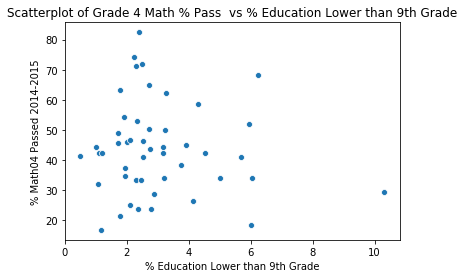

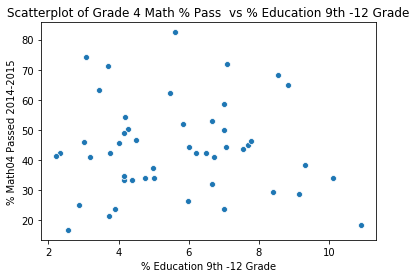

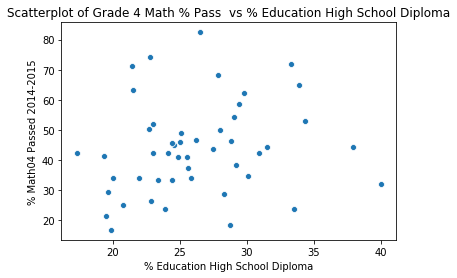

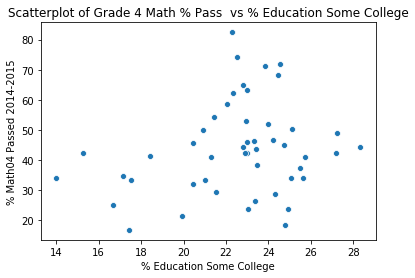

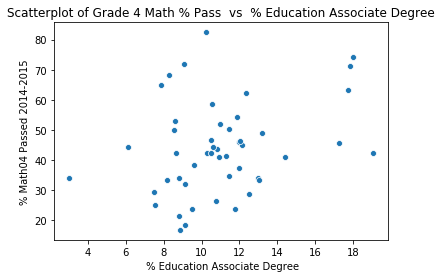

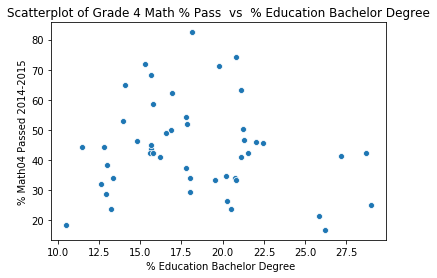

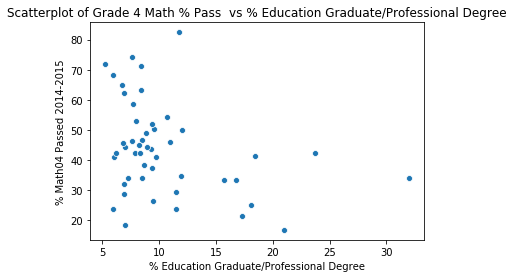

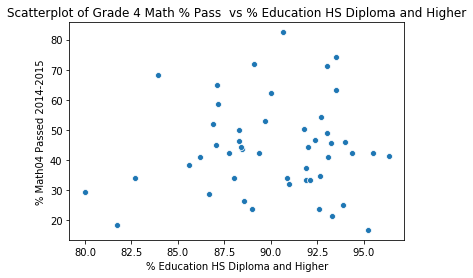

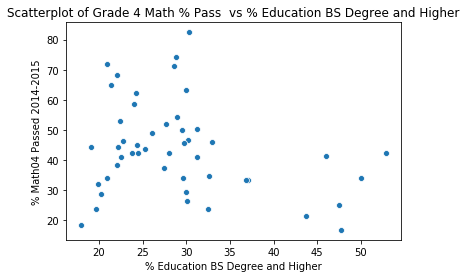

In [21]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH04PCTPROF_1415', data = Parent_social_econ_df_sy201415, legend='full')
    plt.ylabel("% Math04 Passed 2014-2015")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 4 Math % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

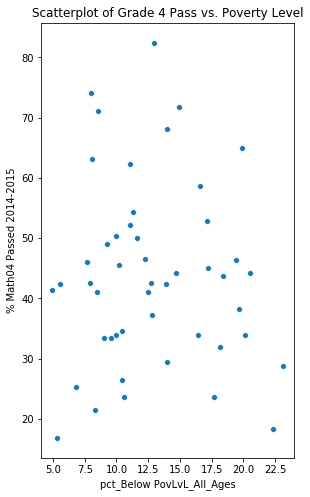

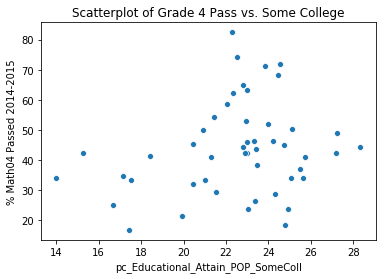

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(121)


sns.scatterplot(x='pct_Below PovLvL_All_Ages',y = "ALL_MTH04PCTPROF_1415", data = df3, legend='full')
plt.ylabel("% Math04 Passed 2014-2015")
plt.title("Scatterplot of Grade 4 Pass vs. Poverty Level")
plt.show()
sns.scatterplot(x='pc_Educational_Attain_POP_SomeColl',y = 'ALL_MTH04PCTPROF_1415', data = df3, legend='full')
plt.ylabel("% Math04 Passed 2014-2015")
plt.title("Scatterplot of Grade 4 Pass vs. Some College")
#plt.subplot(122)
#sns.boxplot(x='bedrooms',y= 'price', data = listings)
#plt.ylabel("price")
#plt.title("Boxplot of Price vs. Bedrooms")
plt.show()

In [23]:
# Create a correlation matrix
corr    = Parent_social_econ_df_sy201415.corr()
pos_cor = corr['ALL_MTH04PCTPROF_1415'] >0
neg_cor = corr['ALL_MTH04PCTPROF_1415'] <0


In [24]:
corr['ALL_MTH04PCTPROF_1415'][pos_cor].sort_values(ascending = False)

ALL_MTH04PCTPROF_1415                        1.000000
ECD_MTH04PCTPROF_1415                        0.975267
ALL_MTH08PCTPROF_1415                        0.917427
ECD_MTH08PCTPROF_1415                        0.881965
HOM_MTH04PCTPROF_1415                        0.833516
HOM_MTH08PCTPROF_1415                        0.659254
pc_Educational_Attain_POP_AssocDeg           0.306394
LEA_CWIFTSE                                  0.298984
LEAID_y                                      0.254859
LEAID_x                                      0.254492
FIPST                                        0.253367
pc_Educational_Attain_POP_SomeColl           0.224595
pc_Educational_Attain_POP_HS_GRAD            0.175194
ALL_MTH04NUMVALID_1415                       0.068674
ALL_MTH08NUMVALID_1415                       0.063445
pct_Educational_Attain_POP_HS_Grad_higher    0.053652
pctmoe_Below PovLvL_Age_gte_65               0.048049
num_Educational_Attain_POP_AssocDeg          0.039606
ECD_MTH08NUMVALID_1415      

In [25]:
corr['ALL_MTH04PCTPROF_1415'][neg_cor].sort_values()

pc_Educational_Attain_POP_GradProf     -0.332161
LEA_CWIFTEST                           -0.294053
pct_Educational_Attain_BS_Deg_higher   -0.269330
pc_Educational_Attain_POP_BacDeg       -0.131489
pc_ Educational_Attain_POP_LT9th       -0.081097
num_Educational_Attain_POP_GradProf    -0.049244
pct_Below PovLvL_Age_18_64             -0.048956
pct_Below PovLvL_Age_gte_18            -0.048787
pct_Below PovLvL_All_Ages              -0.048594
num_Educational_Attain_POP_LT9th       -0.040269
pc_Educational_Attain_POP_9th-12th     -0.025696
pctmoe_Below PovLvL_Age_18_64          -0.021884
pctmoe_Below PovLvL_Age_gte_18         -0.021240
pctmoe_Below PovLvL_All_Ages           -0.020835
PDP02.5_38est                          -0.010970
HOM_MTH04NUMVALID_1415                 -0.006626
Name: ALL_MTH04PCTPROF_1415, dtype: float64

## Summary for  Math on  School Year  2014- 2015

There is slightly less  than moderate correlation between students who are proficient at Math in Grade 4 and parents who have attained at  least  some college education.   


In [26]:
Parent_social_econ_df_sy201415['pc_Educational_Attain_POP_GradProf'].sort_values()

34     5.227991
41     5.934783
3      5.986364
12     6.021739
32     6.210084
18     6.768116
39     6.833333
45     6.872727
14     6.885017
23     6.947368
29     7.019608
1      7.023256
2      7.226950
38     7.612500
15     7.647416
9      7.671642
24     7.838863
40     8.007299
31     8.213675
35     8.295455
26     8.378995
22     8.436364
16     8.483019
25     8.534483
10     8.637931
47     8.853659
17     8.975000
0      9.251852
21     9.340551
44     9.403756
5      9.453125
42     9.589744
46     9.700483
33    10.731219
11    11.000000
4     11.482806
13    11.516564
43    11.750000
36    11.893360
7     12.000000
19    15.708333
30    16.804800
37    17.264706
28    18.074000
27    18.452991
6     20.961783
20    23.699275
8     32.000000
Name: pc_Educational_Attain_POP_GradProf, dtype: float64

In [27]:
#Remove outliers (States  with more than 15% Education Graduate/Professional Degree)

rslt_df = Parent_social_econ_df_sy201415[Parent_social_econ_df_sy201415['pc_Educational_Attain_POP_GradProf']<15]

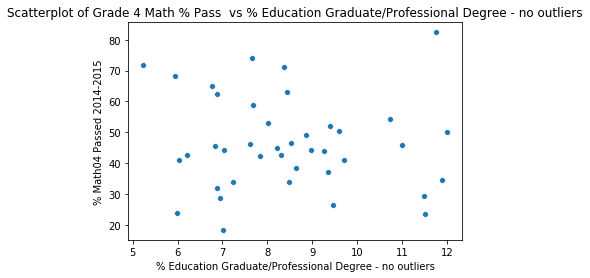

In [28]:

sns.scatterplot(x= 'pc_Educational_Attain_POP_GradProf', y = 'ALL_MTH04PCTPROF_1415', data = rslt_df , legend='full')
plt.ylabel("% Math04 Passed 2014-2015")
xlabel = "% Education Graduate/Professional Degree - no outliers"
plt.xlabel(xlabel)
title = "Scatterplot of Grade 4 Math % Pass  vs {0}".format(xlabel)
plt.title(title)
plt.show()

In [29]:
# Create a correlation matrix
corr1    = rslt_df.corr()
pos_cor1 = corr1['ALL_MTH04PCTPROF_1415'] >0
neg_cor1 = corr1['ALL_MTH04PCTPROF_1415'] <0
corr1['ALL_MTH04PCTPROF_1415'][neg_cor1].sort_values

<bound method Series.sort_values of pct_Below PovLvL_All_Ages            -0.287710
pctmoe_Below PovLvL_All_Ages         -0.275197
pct_Below PovLvL_Age_gte_18          -0.287944
pctmoe_Below PovLvL_Age_gte_18       -0.275790
pct_Below PovLvL_Age_18_64           -0.288599
pctmoe_Below PovLvL_Age_18_64        -0.276271
pct_Below PovLvL_Age_gte_65          -0.090023
pctmoe_Below PovLvL_Age_gte_65       -0.005369
LEA_CWIFTEST                         -0.067762
pc_ Educational_Attain_POP_LT9th     -0.208882
pc_Educational_Attain_POP_9th-12th   -0.259797
pc_Educational_Attain_POP_HS_GRAD    -0.019550
pc_Educational_Attain_POP_SomeColl   -0.069801
pc_Educational_Attain_POP_GradProf   -0.077186
HOM_MTH04NUMVALID_1415               -0.022233
HOM_MTH08NUMVALID_1415               -0.027820
Name: ALL_MTH04PCTPROF_1415, dtype: float64>

### Top 10 and bottom 10 4th grade




In [30]:
df_top10_4th = Parent_social_econ_df_sy201415.nlargest(10, 'ALL_MTH04PCTPROF_1415')

In [31]:
df_bottom10_4th = Parent_social_econ_df_sy201415.nsmallest(10, 'ALL_MTH04PCTPROF_1415')

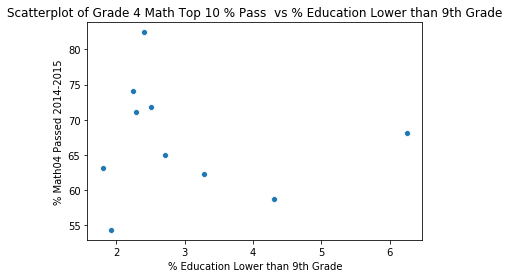

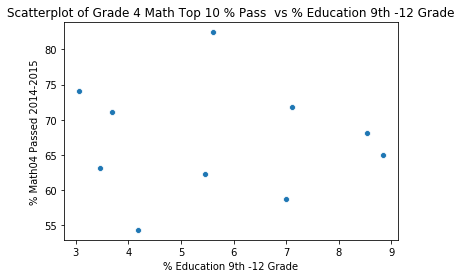

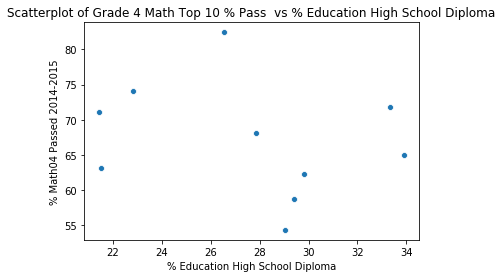

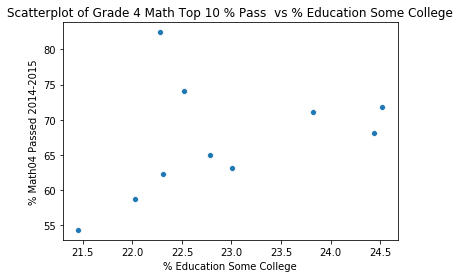

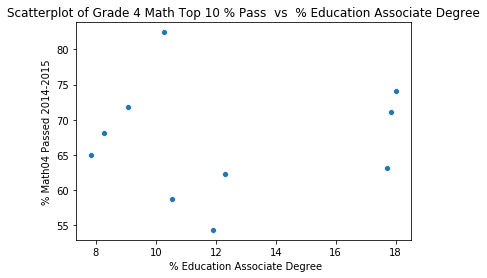

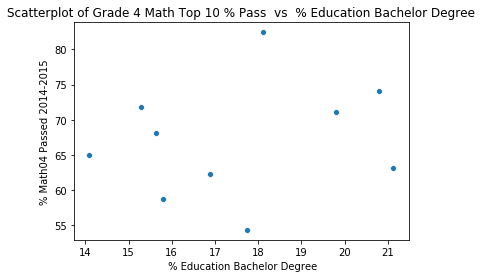

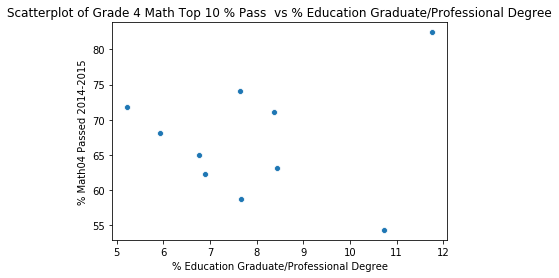

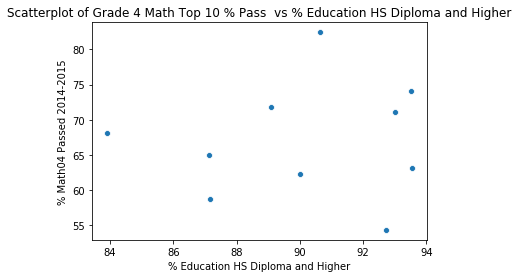

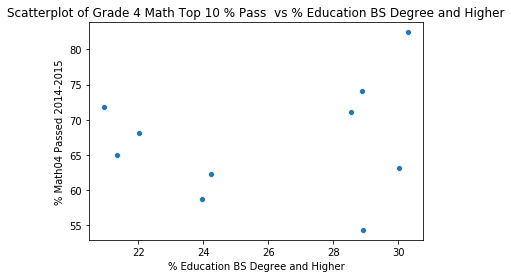

In [32]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH04PCTPROF_1415', data = df_top10_4th, legend='full')
    plt.ylabel("% Math04 Passed 2014-2015")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 4 Math Top 10 % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

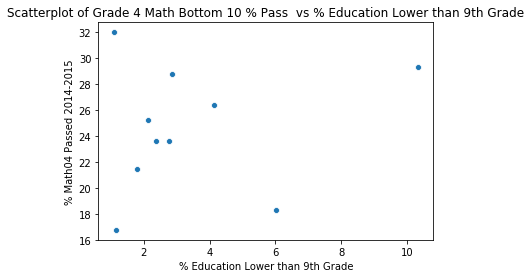

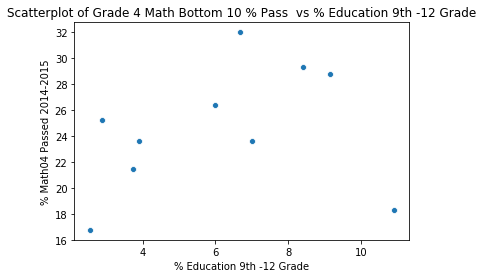

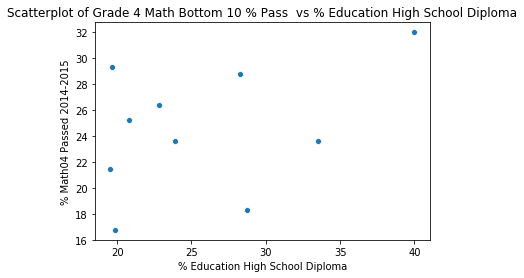

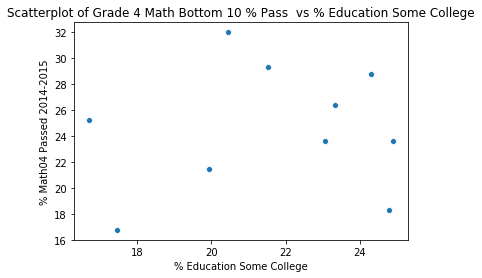

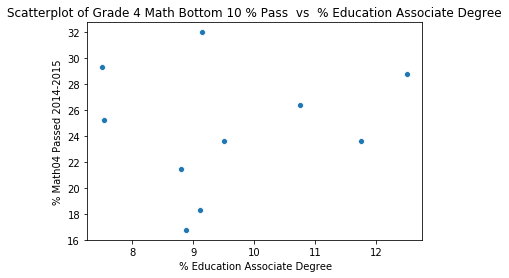

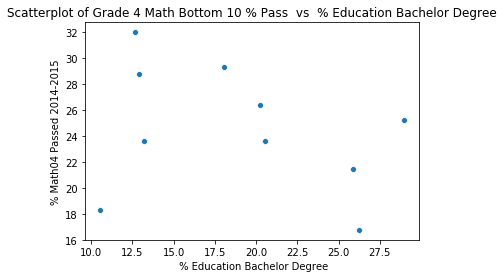

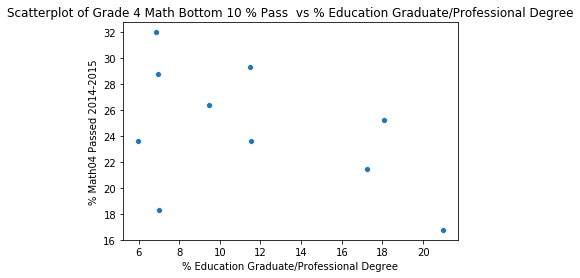

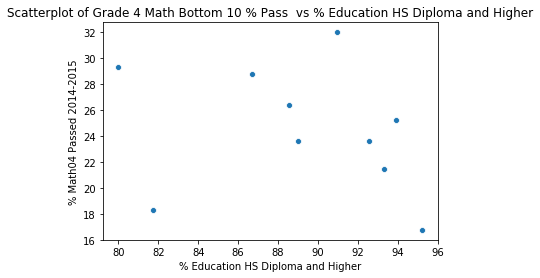

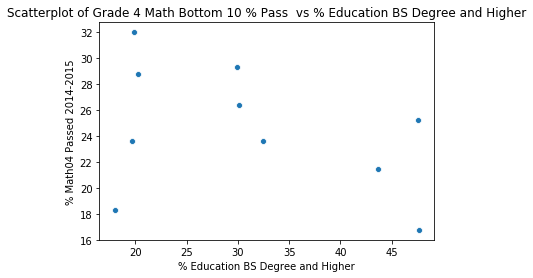

In [33]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH04PCTPROF_1415', data = df_bottom10_4th, legend='full')
    plt.ylabel("% Math04 Passed 2014-2015")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 4 Math Bottom 10 % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

In [34]:
# Create a correlation matrix
corr2   = df_top10_4th.corr()
pos_cor2 = corr2['ALL_MTH04PCTPROF_1415'] >0
neg_cor2 = corr2['ALL_MTH04PCTPROF_1415'] <0
corr2['ALL_MTH04PCTPROF_1415'][pos_cor2].sort_values(ascending = False)

ALL_MTH04PCTPROF_1415                        1.000000
ECD_MTH04PCTPROF_1415                        0.930356
ALL_MTH08PCTPROF_1415                        0.835275
ECD_MTH08PCTPROF_1415                        0.733393
LEA_CWIFTSE                                  0.678601
LEAID_y                                      0.447964
LEAID_x                                      0.447179
FIPST                                        0.445817
HOM_MTH04PCTPROF_1415                        0.435456
pc_Educational_Attain_POP_SomeColl           0.384930
pctmoe_Below PovLvL_All_Ages                 0.301175
pctmoe_Below PovLvL_Age_18_64                0.300177
pctmoe_Below PovLvL_Age_gte_18               0.298731
HOM_MTH08PCTPROF_1415                        0.238399
pc_Educational_Attain_POP_BacDeg             0.204361
pct_Educational_Attain_BS_Deg_higher         0.182729
pctmoe_Below PovLvL_Age_gte_65               0.130254
pc_Educational_Attain_POP_GradProf           0.104534
pct_Below PovLvL_Age_gte_65 

In [35]:
# Create a correlation matrix
corr2   = df_top10_4th.corr()
pos_cor2 = corr2['ALL_MTH04PCTPROF_1415'] >0
neg_cor2 = corr2['ALL_MTH04PCTPROF_1415'] <0
corr2['ALL_MTH08PCTPROF_1415'][neg_cor2].sort_values()

pc_Educational_Attain_POP_HS_GRAD     -0.314091
LEA_CWIFTEST                          -0.118198
HOM_MTH04NUMVALID_1415                -0.030199
pct_Below PovLvL_Age_gte_18           -0.029295
pct_Below PovLvL_All_Ages             -0.029263
pct_Below PovLvL_Age_18_64            -0.029091
HOM_MTH08NUMVALID_1415                 0.011084
num_Educational_Attain_POP_HS_GRAD     0.017537
num_Educational_Attain_POP_AssocDeg    0.023593
num_Educational_Attain_POP_SomeColl    0.042547
PDP02.5_37est                          0.051481
num_Educational_Attain_POP_9th-12th    0.054666
num_Educational_Attain_POP             0.054868
num_Educational_Attain_POP_BacDeg      0.074576
PDP02.5_38est                          0.091678
pc_Educational_Attain_POP_9th-12th     0.120729
num_Educational_Attain_POP_GradProf    0.121158
num_Educational_Attain_POP_LT9th       0.128109
ECD_MTH08NUMVALID_1415                 0.160894
ECD_MTH04NUMVALID_1415                 0.227306
ALL_MTH08NUMVALID_1415                 0

### Top 10 and bottom 10 8th grade


In [36]:
df_top10_8th = Parent_social_econ_df_sy201415.nlargest(10, 'ALL_MTH08PCTPROF_1415')
df_top10_8th

,ST_NAME,LEAID_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pctmoe_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,...,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
43,VIRGINIA,5.102091e+06,202.0,12.931818,4.840152,12.918939,4.828030,12.908333,4.834091,15.488764,...,844.900000,73.433333,32.633333,45.333333,1444.166667,69.100000,610.533333,60.433333,25.500000,35.233333
41,TEXAS,4.826378e+06,202.0,13.959647,6.735598,13.958560,6.736957,13.959647,6.750408,14.653385,...,1350.348624,61.339450,31.366972,44.412844,1713.128440,67.715596,1089.669725,62.825688,25.284404,39.064220
15,IOWA,1.916565e+06,202.0,8.027660,4.907903,8.025836,4.908511,8.030091,4.912158,6.127273,...,515.545455,64.727273,17.090909,29.454545,800.818182,67.363636,438.000000,56.454545,14.181818,30.909091
26,NEBRASKA,3.137500e+06,202.0,8.549315,5.937900,8.552511,5.939726,8.564384,5.951598,5.861905,...,688.500000,64.125000,22.375000,37.750000,1024.250000,65.875000,602.625000,55.750000,18.125000,22.375000
34,OKLAHOMA,4.017859e+06,202.0,14.955756,7.078781,14.944244,7.072235,14.965011,7.095260,11.721759,...,389.272727,65.909091,38.045455,42.681818,548.363636,59.818182,355.000000,52.227273,31.772727,35.454545
9,FLORIDA,1.201020e+06,202.0,16.598507,3.782090,16.598507,3.783582,16.583582,3.788060,16.378689,...,2249.181818,50.781818,72.254545,35.727273,3569.618182,58.727273,2149.290909,50.127273,58.000000,37.763636
18,LOUISIANA,2.201077e+06,202.0,19.904348,4.808696,19.886957,4.801449,19.900000,4.808696,15.209091,...,713.081081,60.000000,32.513514,40.837838,965.918919,55.081081,649.000000,48.594595,27.216216,36.594595
40,TENNESSEE,4.702153e+06,202.0,17.120438,5.870803,17.121898,5.871533,17.161314,5.890511,11.234286,...,1389.333333,42.733333,30.533333,34.200000,2176.466667,54.000000,1266.733333,43.333333,27.666667,24.933333
22,MINNESOTA,2.718913e+06,202.0,8.032121,4.026970,8.031515,4.027273,8.023636,4.051818,7.294382,...,488.636364,47.727273,22.227273,27.272727,975.272727,52.272727,443.045455,34.909091,18.363636,20.318182
14,INDIANA,1.806528e+06,202.0,11.027526,4.963763,11.024042,4.963763,11.015331,4.953310,9.690728,...,433.108108,53.702703,28.135135,39.405405,699.837838,49.891892,402.702703,39.972973,20.513514,25.324324


In [37]:
df_bottom10_8th = Parent_social_econ_df_sy201415.nsmallest(10, 'ALL_MTH08PCTPROF_1415')
df_bottom10_8th

,ST_NAME,LEAID_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pctmoe_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,...,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
6,CONNECTICUT,9.026891e+05,202.0,5.324841,3.580255,5.324204,3.579618,5.328662,3.584713,3.781319,...,873.600000,13.200000,22.000000,13.000000,1057.000000,13.400000,761.600000,9.000000,17.200000,19.000000
29,NEW MEXICO,3.501317e+06,202.0,22.335294,7.364706,22.329412,7.370588,22.331373,7.382353,20.267742,...,481.461538,15.307692,23.769231,15.923077,591.153846,14.384615,439.153846,11.153846,18.615385,18.846154
3,ARKANSAS,5.068456e+05,202.0,17.702727,8.444091,17.690455,8.431818,17.725909,8.459091,15.794444,...,287.100000,17.100000,13.366667,21.966667,325.133333,16.166667,223.866667,13.833333,11.100000,22.666667
16,KANSAS,2.007427e+06,202.0,9.932830,6.162264,9.924151,6.162642,9.932453,6.172453,5.676842,...,619.071429,23.928571,27.857143,18.428571,1075.142857,19.000000,549.571429,10.357143,23.500000,19.142857
36,PENNSYLVANIA,4.214613e+06,202.0,10.471630,4.255734,10.471227,4.255533,10.484708,4.263581,6.744771,...,847.625000,26.208333,32.708333,20.625000,953.625000,20.208333,693.958333,13.208333,20.750000,19.458333
45,WEST VIRGINIA,5.400840e+06,202.0,18.138182,5.552727,18.140000,5.549091,18.158182,5.563636,9.507143,...,482.388889,28.111111,21.833333,24.000000,597.944444,21.333333,388.944444,15.944444,17.222222,20.222222
24,MISSOURI,2.918444e+06,202.0,13.890758,7.568483,13.884123,7.564929,13.877725,7.563270,10.724551,...,379.666667,33.527778,32.500000,22.972222,450.333333,22.750000,296.611111,18.472222,26.027778,21.138889
8,DISTRICT OF COLUMBIA,1.100030e+06,202.0,16.400000,1.000000,16.400000,1.000000,16.400000,1.000000,18.000000,...,973.000000,28.000000,40.666667,20.666667,621.000000,23.000000,565.666667,22.666667,23.666667,18.333333
28,NEW JERSEY,3.409452e+06,202.0,6.822600,4.663400,6.821200,4.663400,6.824400,4.667800,6.718254,...,644.529412,19.235294,19.352941,19.588235,789.235294,23.411765,540.117647,18.823529,13.823529,21.411765
37,RHODE ISLAND,4.400607e+06,202.0,8.332353,3.479412,8.332353,3.479412,8.294118,3.488235,11.554545,...,856.000000,12.500000,10.500000,25.000000,929.000000,24.000000,725.500000,14.000000,7.500000,25.000000


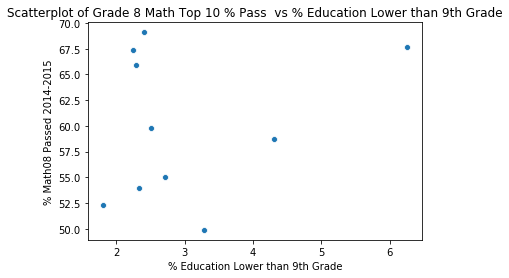

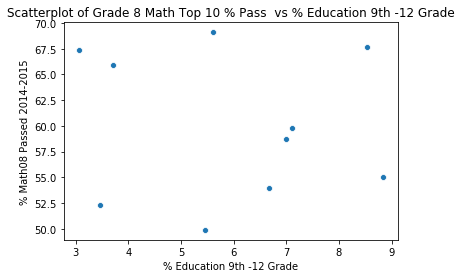

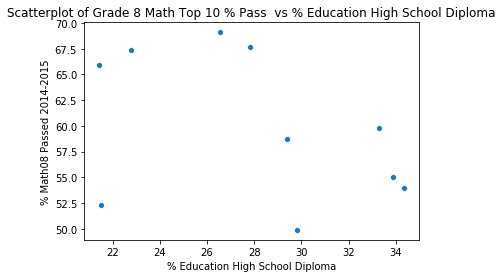

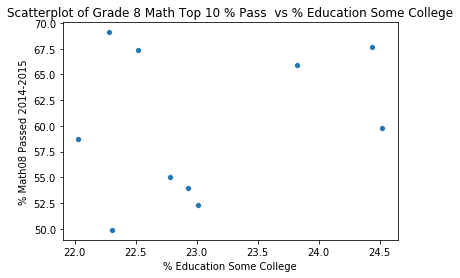

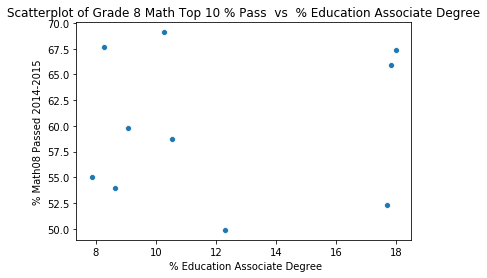

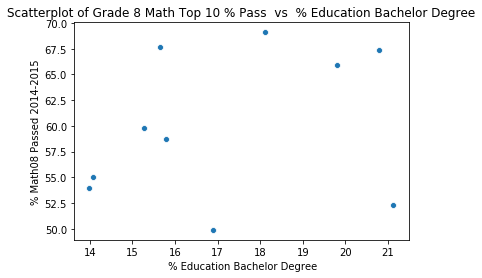

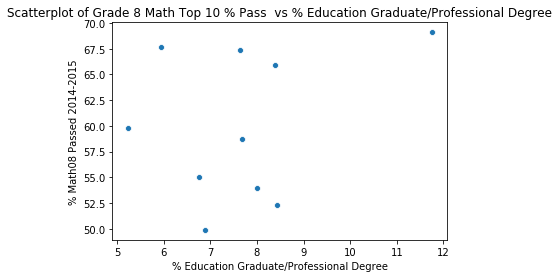

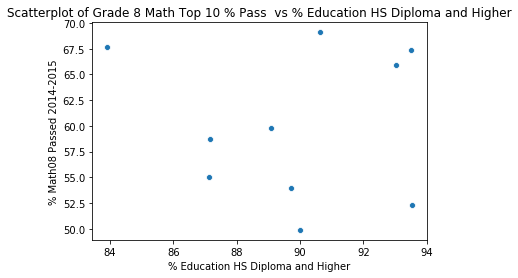

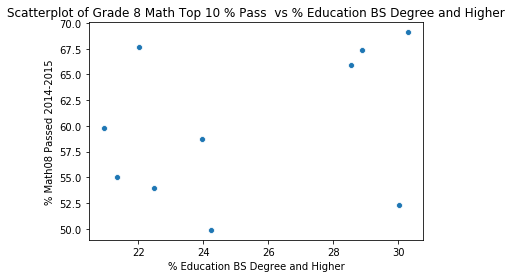

In [38]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH08PCTPROF_1415', data = df_top10_8th, legend='full')
    plt.ylabel("% Math08 Passed 2014-2015")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 8 Math Top 10 % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

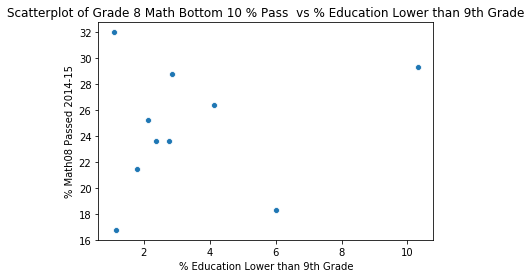

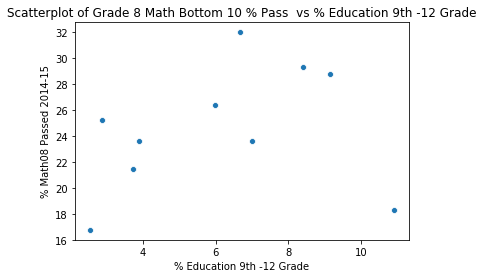

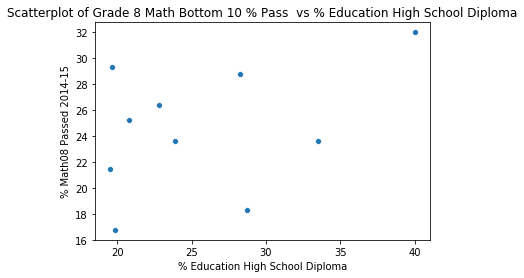

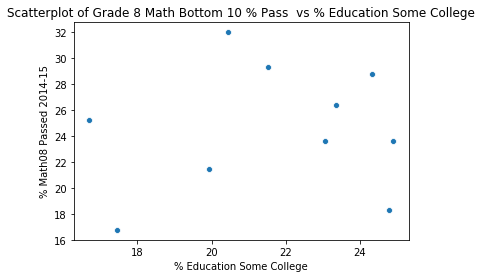

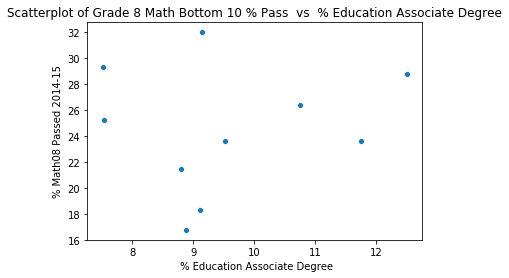

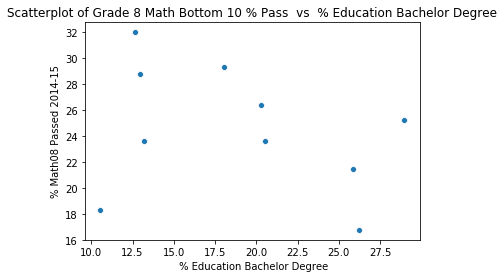

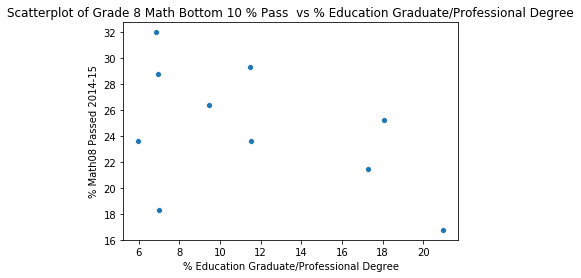

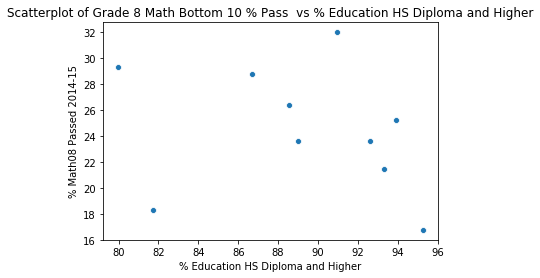

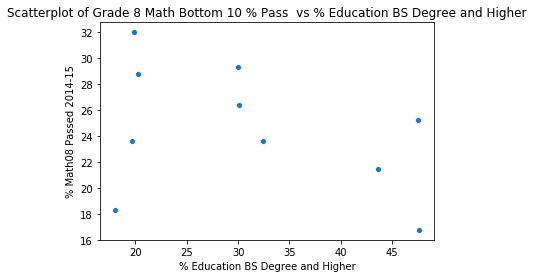

In [39]:
for key, value in Education_dict.items():
    sns.scatterplot(x= key, y = 'ALL_MTH04PCTPROF_1415', data = df_bottom10_4th, legend='full')
    plt.ylabel("% Math08 Passed 2014-15")
    xlabel = "{0}".format(value)
    plt.xlabel(xlabel)
    title = "Scatterplot of Grade 8 Math Bottom 10 % Pass  vs {0}".format(value)
    plt.title(title)
    plt.show()

In [40]:
# Create a correlation matrix
corr3   = df_top10_8th.corr()
pos_cor3 = corr3['ALL_MTH04PCTPROF_1415'] >0
neg_cor3 = corr3['ALL_MTH04PCTPROF_1415'] <0
corr3['ALL_MTH04PCTPROF_1415'][pos_cor3].sort_values(ascending = False)

ALL_MTH04PCTPROF_1415                        1.000000
ECD_MTH04PCTPROF_1415                        0.953621
ALL_MTH08PCTPROF_1415                        0.756044
ECD_MTH08PCTPROF_1415                        0.671971
pct_Educational_Attain_BS_Deg_higher         0.482091
pc_Educational_Attain_POP_BacDeg             0.440103
HOM_MTH04PCTPROF_1415                        0.395793
LEA_CWIFTSE                                  0.372428
pc_Educational_Attain_POP_GradProf           0.370931
LEAID_y                                      0.294768
LEAID_x                                      0.294130
FIPST                                        0.291898
pctmoe_Below PovLvL_Age_gte_65               0.277157
HOM_MTH08PCTPROF_1415                        0.276051
pct_Educational_Attain_POP_HS_Grad_higher    0.234218
pc_Educational_Attain_POP_AssocDeg           0.207762
pctmoe_Below PovLvL_All_Ages                 0.181169
pctmoe_Below PovLvL_Age_gte_18               0.178590
pctmoe_Below PovLvL_Age_18_6

In [41]:
# Create a correlation matrix
corr3['ALL_MTH08PCTPROF_1415'][neg_cor3].sort_values()

pc_Educational_Attain_POP_HS_GRAD     -0.405967
pct_Below PovLvL_Age_18_64            -0.230797
pct_Below PovLvL_Age_gte_18           -0.230661
pct_Below PovLvL_All_Ages             -0.230464
HOM_MTH08NUMVALID_1415                -0.110538
pc_Educational_Attain_POP_9th-12th    -0.102883
num_Educational_Attain_POP_HS_GRAD    -0.100455
HOM_MTH04NUMVALID_1415                -0.099532
num_Educational_Attain_POP_SomeColl   -0.071141
num_Educational_Attain_POP_AssocDeg   -0.069963
num_Educational_Attain_POP_9th-12th   -0.065407
PDP02.5_37est                         -0.053033
num_Educational_Attain_POP            -0.050606
num_Educational_Attain_POP_BacDeg     -0.022910
ECD_MTH08NUMVALID_1415                -0.006520
PDP02.5_38est                          0.000313
ALL_MTH08NUMVALID_1415                 0.024428
num_Educational_Attain_POP_LT9th       0.029095
num_Educational_Attain_POP_GradProf    0.041115
pct_Below PovLvL_Age_gte_65            0.061560
ECD_MTH04NUMVALID_1415                 0

In [42]:
# Create a correlation matrix for bottom 10
corr4   = df_bottom10_8th.corr()
pos_cor4 = corr3['ALL_MTH04PCTPROF_1415'] >0
neg_cor4 = corr3['ALL_MTH04PCTPROF_1415'] <0
corr4['ALL_MTH04PCTPROF_1415'][pos_cor4].sort_values(ascending = False)

ALL_MTH04PCTPROF_1415                        1.000000
ECD_MTH04PCTPROF_1415                        0.958423
ALL_MTH08PCTPROF_1415                        0.576432
ECD_MTH08PCTPROF_1415                        0.518903
HOM_MTH04PCTPROF_1415                        0.487580
LEAID_y                                      0.151187
LEAID_x                                      0.151016
FIPST                                        0.148684
pc_Educational_Attain_POP_AssocDeg           0.132798
pctmoe_Below PovLvL_All_Ages                 0.032662
pctmoe_Below PovLvL_Age_gte_18               0.032346
pctmoe_Below PovLvL_Age_18_64                0.030907
pct_Educational_Attain_POP_HS_Grad_higher   -0.006826
LEA_CWIFTSE                                 -0.010237
pc_Educational_Attain_POP_SomeColl          -0.034822
pctmoe_Below PovLvL_Age_gte_65              -0.081544
pc_Educational_Attain_POP_GradProf          -0.100504
LEA_CWIFTEST                                -0.179517
HOM_MTH08PCTPROF_1415       

In [43]:
# Create a correlation matrix
corr4['ALL_MTH04PCTPROF_1415'][neg_cor4].sort_values()

ECD_MTH08NUMVALID_1415                -0.305868
ALL_MTH08NUMVALID_1415                -0.189229
ECD_MTH04NUMVALID_1415                -0.119307
pct_Below PovLvL_Age_gte_65           -0.118247
pc_Educational_Attain_POP_9th-12th    -0.046173
ALL_MTH04NUMVALID_1415                 0.030633
pc_ Educational_Attain_POP_LT9th       0.035273
pct_Below PovLvL_Age_gte_18            0.098156
pct_Below PovLvL_All_Ages              0.098162
pct_Below PovLvL_Age_18_64             0.098338
num_Educational_Attain_POP_AssocDeg    0.169810
num_Educational_Attain_POP_9th-12th    0.189453
num_Educational_Attain_POP_SomeColl    0.195255
num_Educational_Attain_POP_LT9th       0.198709
num_Educational_Attain_POP_BacDeg      0.207758
num_Educational_Attain_POP             0.209887
PDP02.5_37est                          0.211901
num_Educational_Attain_POP_HS_GRAD     0.212976
PDP02.5_38est                          0.218299
num_Educational_Attain_POP_GradProf    0.223936
pc_Educational_Attain_POP_HS_GRAD      0

In [44]:
corr4

,LEAID_x,Iteration_x,pct_Below PovLvL_All_Ages,pctmoe_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pctmoe_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pctmoe_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,pctmoe_Below PovLvL_Age_gte_65,...,ECD_MTH04NUMVALID_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04NUMVALID_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08NUMVALID_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08NUMVALID_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08NUMVALID_1415,HOM_MTH08PCTPROF_1415
LEAID_x,1.000000,NaN,0.067878,0.009131,0.068325,0.009836,0.067163,0.009547,-0.122281,0.129938,...,-0.027112,0.166754,-0.148052,0.462184,0.106895,0.444565,0.105186,0.049893,-0.145598,0.229990
Iteration_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_Below PovLvL_All_Ages,0.067878,NaN,1.000000,0.422566,1.000000,0.422699,0.999996,0.423262,0.826039,-0.293476,...,-0.534193,0.243313,0.160210,0.177307,-0.756152,-0.191853,-0.693048,0.178221,0.178038,-0.207895
pctmoe_Below PovLvL_All_Ages,0.009131,NaN,0.422566,1.000000,0.422027,0.999998,0.422936,0.999996,0.149892,0.699013,...,-0.943421,0.026157,-0.325475,0.053748,-0.498907,-0.369909,-0.755626,-0.334709,-0.015080,0.184826
pct_Below PovLvL_Age_gte_18,0.068325,NaN,1.000000,0.422027,1.000000,0.422161,0.999995,0.422724,0.826030,-0.293938,...,-0.533752,0.243416,0.160374,0.177422,-0.756010,-0.191573,-0.692695,0.178482,0.178021,-0.208032
pctmoe_Below PovLvL_Age_gte_18,0.009836,NaN,0.422699,0.999998,0.422161,1.000000,0.423067,0.999995,0.150040,0.698974,...,-0.943142,0.025899,-0.325114,0.052905,-0.498224,-0.370191,-0.755053,-0.335252,-0.014559,0.184102
pct_Below PovLvL_Age_18_64,0.067163,NaN,0.999996,0.422936,0.999995,0.423067,1.000000,0.423633,0.825030,-0.292848,...,-0.534690,0.243807,0.160508,0.176555,-0.756291,-0.192909,-0.693573,0.177882,0.178348,-0.209092
pctmoe_Below PovLvL_Age_18_64,0.009547,NaN,0.423262,0.999996,0.422724,0.999995,0.423633,1.000000,0.150559,0.699035,...,-0.943203,0.024459,-0.326709,0.053280,-0.498388,-0.371059,-0.755090,-0.336080,-0.016523,0.184848
pct_Below PovLvL_Age_gte_65,-0.122281,NaN,0.826039,0.149892,0.826030,0.150040,0.825030,0.150559,1.000000,-0.526337,...,-0.244807,-0.039431,0.074429,0.165955,-0.692473,-0.065690,-0.464903,0.321507,-0.040781,0.011908
pctmoe_Below PovLvL_Age_gte_65,0.129938,NaN,-0.293476,0.699013,-0.293938,0.698974,-0.292848,0.699035,-0.526337,1.000000,...,-0.527048,-0.192850,-0.511290,-0.049935,0.157963,-0.286940,-0.166368,-0.622409,-0.217061,0.331190


In [45]:
#corr4.columns
pct_cols = [col for col in corr4.columns if ((('pc' in col) and ('moe'not in col)) or ('PCTPROF' in col))]
pct_cols

['pct_Below PovLvL_All_Ages',
 'pct_Below PovLvL_Age_gte_18',
 'pct_Below PovLvL_Age_18_64',
 'pct_Below PovLvL_Age_gte_65',
 'pc_ Educational_Attain_POP_LT9th',
 'pc_Educational_Attain_POP_9th-12th',
 'pc_Educational_Attain_POP_HS_GRAD',
 'pc_Educational_Attain_POP_SomeColl',
 'pc_Educational_Attain_POP_AssocDeg',
 'pc_Educational_Attain_POP_BacDeg',
 'pc_Educational_Attain_POP_GradProf',
 'pct_Educational_Attain_POP_HS_Grad_higher',
 'pct_Educational_Attain_BS_Deg_higher',
 'ALL_MTH04PCTPROF_1415',
 'ECD_MTH04PCTPROF_1415',
 'HOM_MTH04PCTPROF_1415',
 'ALL_MTH08PCTPROF_1415',
 'ECD_MTH08PCTPROF_1415',
 'HOM_MTH08PCTPROF_1415']

In [46]:
df_top10_8th_pct   = df_top10_8th[pct_cols]
df_top10_8th_pct_corr = df_top10_8th_pct.corr()

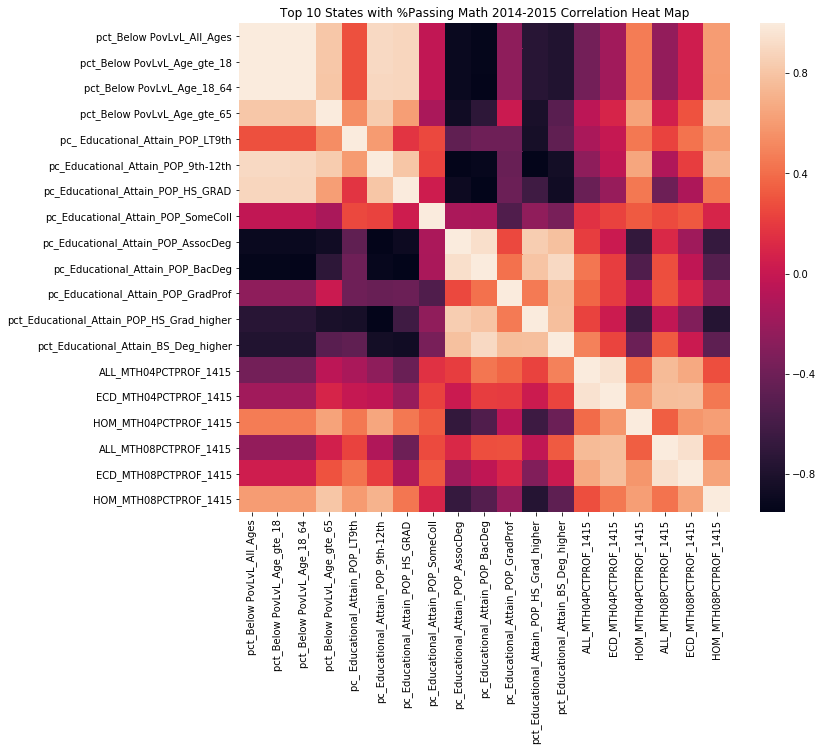

In [47]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_top10_8th_pct_corr)
plt.title('Top 10 States with %Passing Math 2014-2015 Correlation Heat Map')
plt.show()

In [48]:
df_bottom10_8th_pct   = df_bottom10_8th[pct_cols]
df_bottom10_8th_pct_corr = df_bottom10_8th_pct.corr()

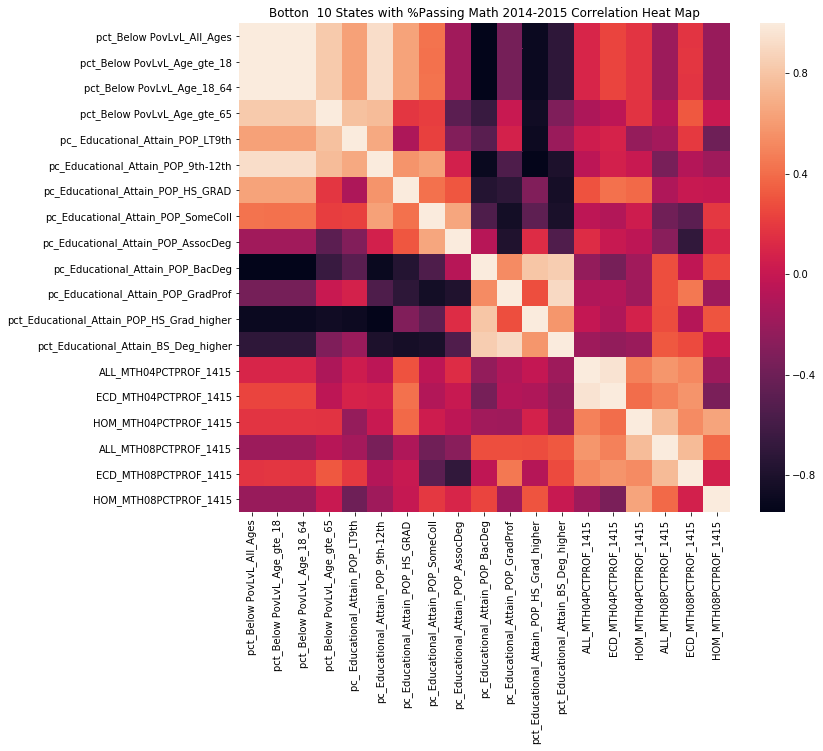

In [49]:
fig, bx = plt.subplots(figsize=(11, 9))
sns.heatmap(df_bottom10_8th_pct_corr)
plt.title('Botton  10 States with %Passing Math 2014-2015 Correlation Heat Map')
plt.show()

In [50]:
#list_of_math_dfs['df_1718'].to_csv (r'./data_sets/clean/math_scores_sy1718.csv',index=False, header=True)


In [51]:
df_top10_8th_pct_corr.to_csv(r'./correlation_data/df_top10_8th_pct_sy1415_corr.csv',index=True, header=True )

In [52]:
#obtain only % related data

pct_cols2 = pct_cols.copy()
pct_cols2.insert(0,"ST_NAME")

df_top10_8th_pct_ = df_top10_8th[pct_cols2]
df_top10_8th_pct
#df_top10_8th_pct.to_csv(r'./correlation_data/df_top10_8th_pct_sy1415.csv',index=False, header=True )

#df = df_top10_8th_ri

#df_top10_8th_pc_col2 = df[pct_col1]
#pct_cols

,pct_Below PovLvL_All_Ages,pct_Below PovLvL_Age_gte_18,pct_Below PovLvL_Age_18_64,pct_Below PovLvL_Age_gte_65,pc_ Educational_Attain_POP_LT9th,pc_Educational_Attain_POP_9th-12th,pc_Educational_Attain_POP_HS_GRAD,pc_Educational_Attain_POP_SomeColl,pc_Educational_Attain_POP_AssocDeg,pc_Educational_Attain_POP_BacDeg,pc_Educational_Attain_POP_GradProf,pct_Educational_Attain_POP_HS_Grad_higher,pct_Educational_Attain_BS_Deg_higher,ALL_MTH04PCTPROF_1415,ECD_MTH04PCTPROF_1415,HOM_MTH04PCTPROF_1415,ALL_MTH08PCTPROF_1415,ECD_MTH08PCTPROF_1415,HOM_MTH08PCTPROF_1415
43,12.931818,12.918939,12.908333,15.488764,2.401515,5.606061,26.530303,22.280303,10.257576,18.121212,11.750000,90.636364,30.303030,82.433333,73.433333,45.333333,69.100000,60.433333,35.233333
41,13.959647,13.958560,13.959647,14.653385,6.255435,8.538043,27.836957,24.436141,8.281250,15.639946,5.934783,83.915761,22.028533,68.155963,61.339450,44.412844,67.715596,62.825688,39.064220
15,8.027660,8.025836,8.030091,6.127273,2.243161,3.060790,22.796353,22.516717,18.003040,20.793313,7.647416,93.516717,28.884498,74.090909,64.727273,29.454545,67.363636,56.454545,30.909091
26,8.549315,8.552511,8.564384,5.861905,2.292237,3.698630,21.433790,23.826484,17.853881,19.799087,8.378995,93.018265,28.552511,71.125000,64.125000,37.750000,65.875000,55.750000,22.375000
34,14.955756,14.944244,14.965011,11.721759,2.510158,7.106095,33.311512,24.521445,9.079007,15.279910,5.227991,89.099323,20.941309,71.772727,65.909091,42.681818,59.818182,52.227273,35.454545
9,16.598507,16.598507,16.583582,16.378689,4.313433,7.000000,29.388060,22.029851,10.537313,15.791045,7.671642,87.149254,23.970149,58.709091,50.781818,35.727273,58.727273,50.127273,37.763636
18,19.904348,19.886957,19.900000,15.209091,2.710145,8.840580,33.884058,22.782609,7.855072,14.086957,6.768116,87.130435,21.347826,64.972973,60.000000,40.837838,55.081081,48.594595,36.594595
40,17.120438,17.121898,17.161314,11.234286,2.335766,6.678832,34.335766,22.927007,8.620438,13.985401,8.007299,89.715328,22.467153,52.866667,42.733333,34.200000,54.000000,43.333333,24.933333
22,8.032121,8.031515,8.023636,7.294382,1.803030,3.454545,21.487879,23.009091,17.721212,21.127273,8.436364,93.527273,30.015152,63.136364,47.727273,27.272727,52.272727,34.909091,20.318182
14,11.027526,11.024042,11.015331,9.690728,3.278746,5.456446,29.818815,22.306620,12.320557,16.895470,6.885017,90.010453,24.233449,62.297297,53.702703,39.405405,49.891892,39.972973,25.324324
